# Data Segmentation (Clustering)
___
By : Omar Ahmed Sabri 

### 1) Import Libraries

here we are importing needed libraries

In [367]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

### 2) Reading Data

In [368]:
dataset=pd.read_csv('segmentation data.csv')

In [369]:
dataset.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [370]:
dataset.tail()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [371]:
dataset.shape

(2000, 8)

### 3) Data information, preprocessing and visualization

In [372]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [373]:
dataset.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [374]:
dataset.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

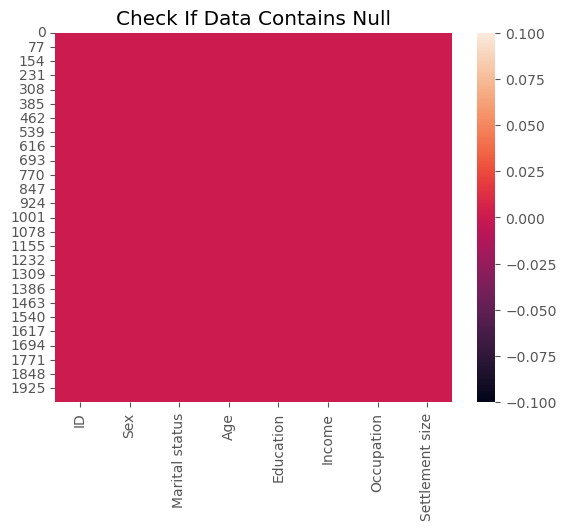

In [375]:
sns.heatmap(dataset.isnull())
plt.title("Check If Data Contains Null")
plt.show()

In [376]:
dataset.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [377]:
temp_dataset=dataset.copy()
temp_dataset

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


Decode Categorical Data

In [378]:
temp_dataset['Sex']=temp_dataset['Sex'].map({0:"female",1:"male"})
temp_dataset['Marital status']=temp_dataset['Marital status'].map({0:"single",1:"non-single"})
temp_dataset['Education']=temp_dataset['Education'].map({0:"unknown",1:"high-school",2:"university",3:"graduated"})
temp_dataset['Occupation']=temp_dataset['Occupation'].map({0:"unemployed",1:"skilled-employee",2:"management"})
temp_dataset['Settlement size']=temp_dataset['Settlement size'].map({0:"small city",1:"mid-sized city",2:"big city"})

In [379]:
value_counts=temp_dataset[['Sex', 'Marital status', 'Education','Occupation', 'Settlement size']]

In [380]:
for i in value_counts:
    print(f'The value counts for "{i}"')
    print(value_counts[i].value_counts())
    print("---------------------------")

The value counts for "Sex"
Sex
female    1086
male       914
Name: count, dtype: int64
---------------------------
The value counts for "Marital status"
Marital status
single        1007
non-single     993
Name: count, dtype: int64
---------------------------
The value counts for "Education"
Education
high-school    1386
university      291
unknown         287
graduated        36
Name: count, dtype: int64
---------------------------
The value counts for "Occupation"
Occupation
skilled-employee    1113
unemployed           633
management           254
Name: count, dtype: int64
---------------------------
The value counts for "Settlement size"
Settlement size
small city        989
mid-sized city    544
big city          467
Name: count, dtype: int64
---------------------------


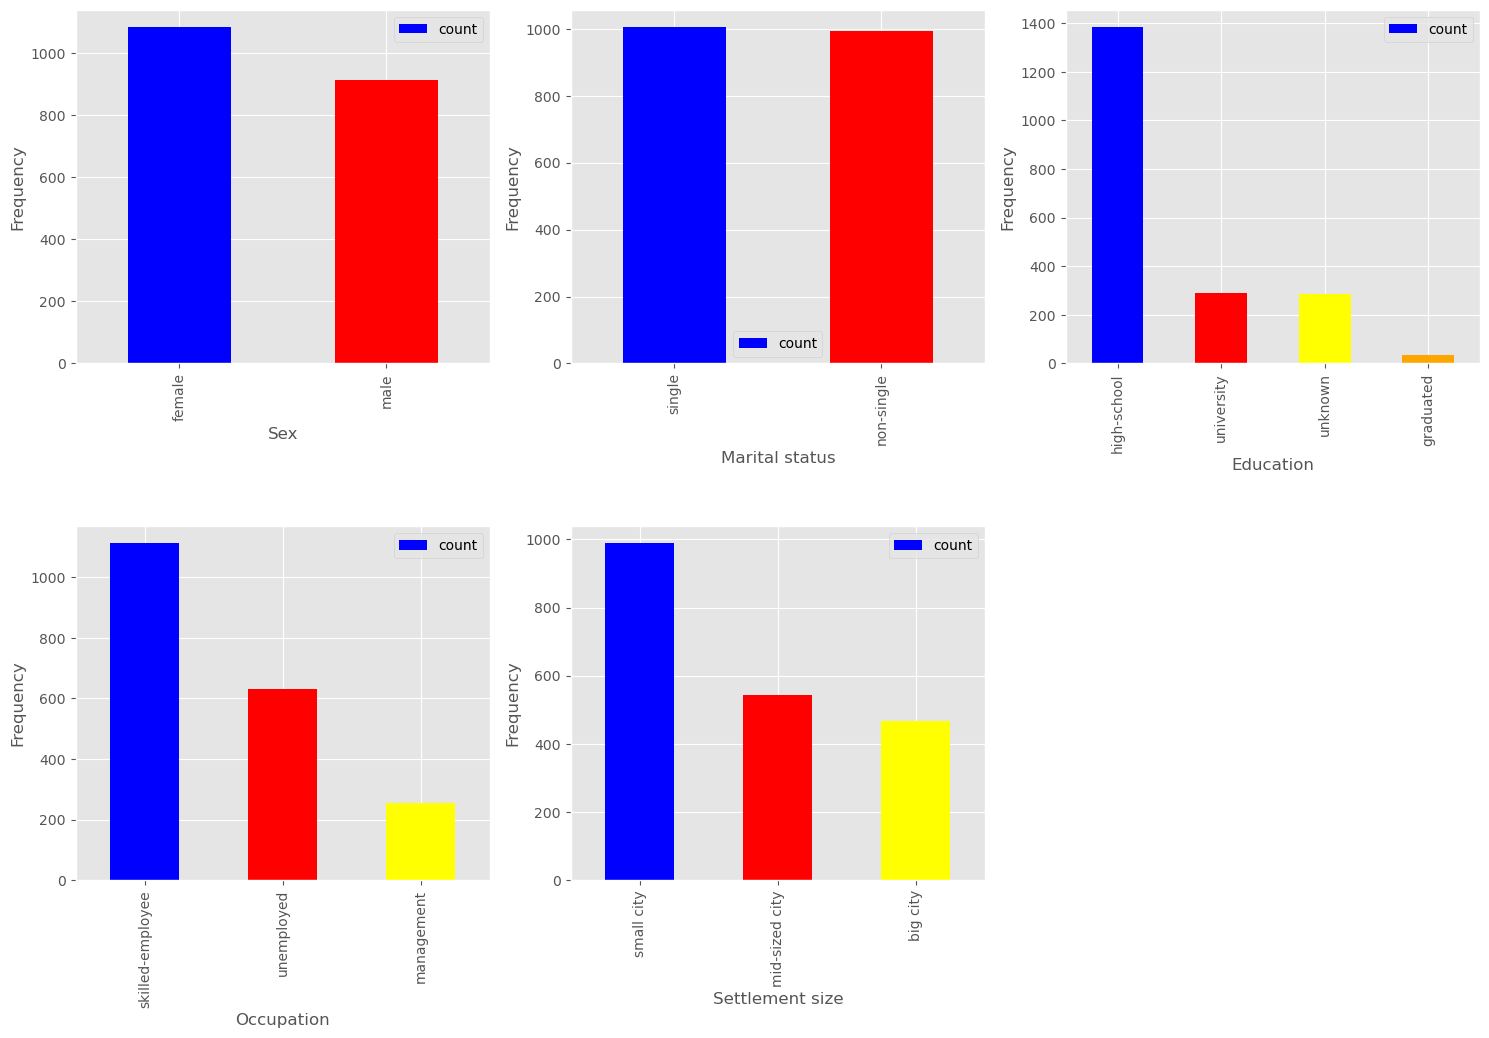

In [381]:
fig = plt.figure(figsize=(15,40))
for i in range(value_counts.shape[1]):
    plt.subplot(8, 3, i+1)
    value_counts.iloc[:,i].value_counts().plot(kind='bar', color=["blue","red","yellow","orange"])
    plt.xlabel(value_counts.columns[i])
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
plt.show()

#### Detect outliers

In [382]:
contanious_columns=["Age","Income"]

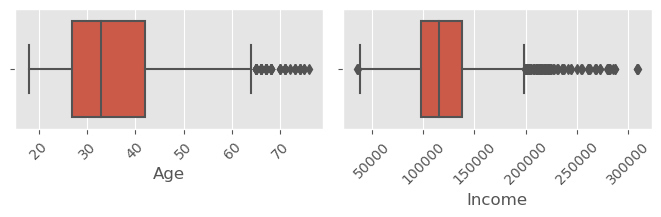

In [383]:
fig = plt.figure(figsize=(10,10))
for i in range(len(contanious_columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x=dataset[contanious_columns[i]])
    plt.xticks(rotation=45)
    plt.tight_layout()

#### Observations:

There are Outliers in columns (Age,Income)

In [384]:
for i in contanious_columns:
    Q3 = dataset[i].quantile(.75)
    Q1= dataset[i].quantile(.25)
    IQR = Q3 - Q1
    upper_limit = Q3 + (1.5*IQR)
    lower_limit = Q1 - (1.5*IQR)
    dataset.drop(dataset[dataset[i] > upper_limit].index, inplace=True)
    dataset.drop(dataset[dataset[i] < lower_limit].index, inplace=True)

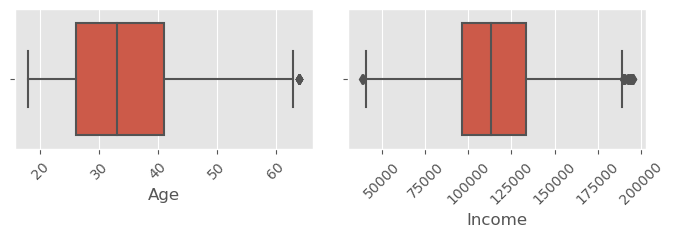

In [385]:
fig = plt.figure(figsize=(10,10))
for i in range(len(contanious_columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x=dataset[contanious_columns[i]])
    plt.tight_layout()
    plt.xticks(rotation=45)
plt.show()

In [386]:
def plotPie(feature):
    
    plt.pie(dataset[feature].value_counts(),labels=temp_dataset[feature].unique(),autopct ='%1.2f%%' , labeldistance = 1.1,
            explode = [0.05 for i in range(len(dataset[feature].value_counts()))])
    
    plt.title(f'Distribution of {feature}')
    plt.show()

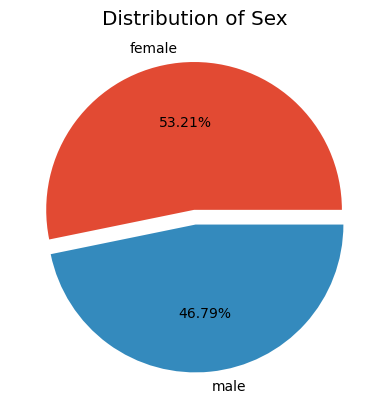

In [387]:
plotPie('Sex')

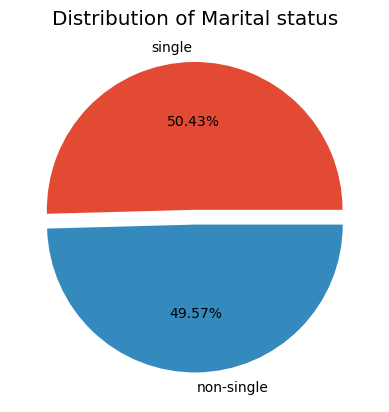

In [388]:
plotPie('Marital status')

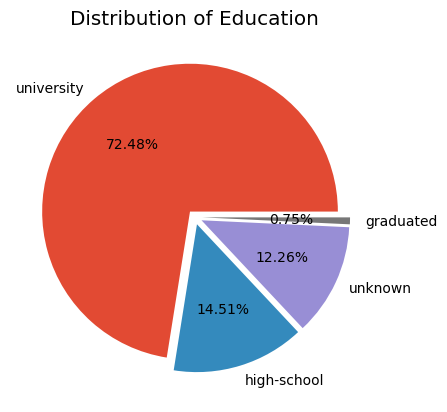

In [389]:
plotPie('Education')

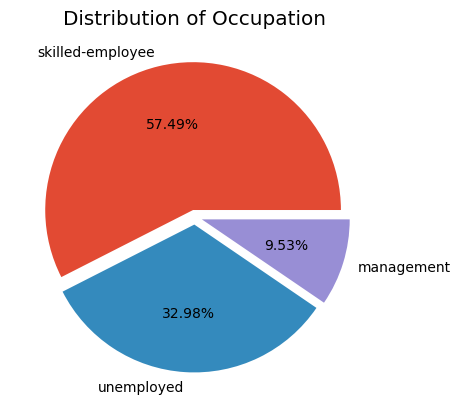

In [390]:
plotPie('Occupation')

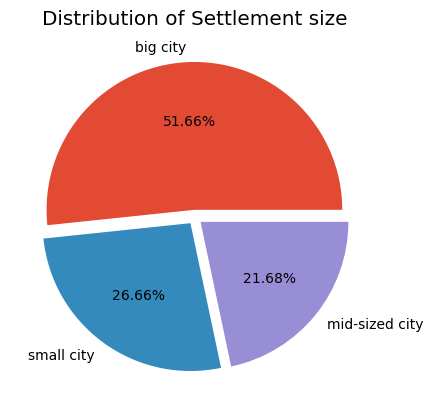

In [391]:
plotPie('Settlement size')

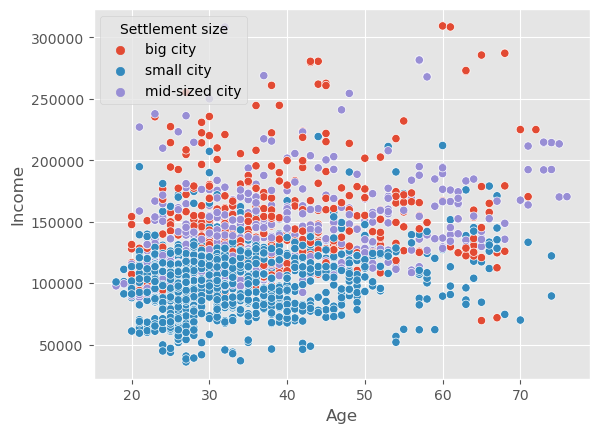

In [392]:
sns.scatterplot(x='Age',y='Income',hue='Settlement size',data=temp_dataset)
plt.show()

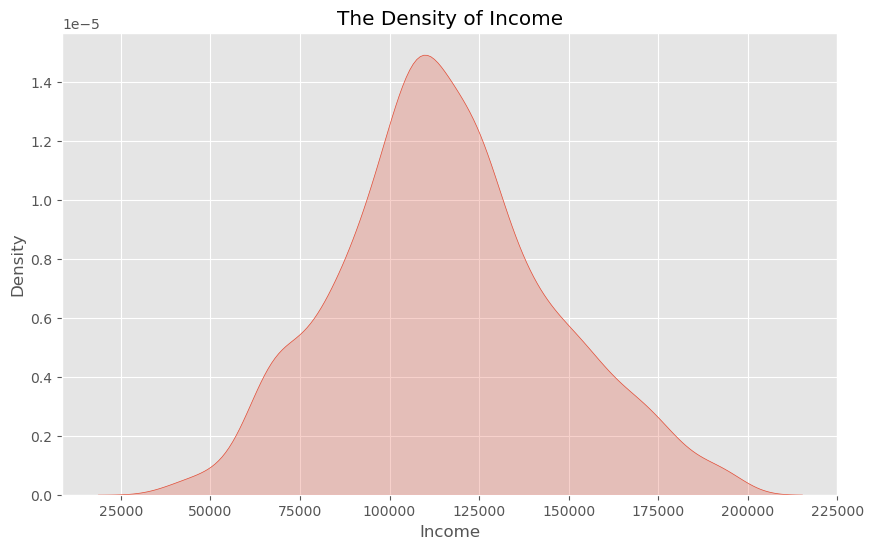

In [393]:
fig, ax = plt.subplots(figsize=(10,6))
sns.kdeplot(dataset['Income'], shade=True)
plt.title('The Density of Income')
plt.show()

In [394]:
def RelKPlot(feature,Selectedfeature,FirstValue,SecondValue) : 
    global dataset
    fig, ax = plt.subplots(figsize=(30,8))
    
    plt.subplot(1,6,1)
    plt.title('Total')
    Data = dataset
    sns.kdeplot(Data[feature], shade=True)   

    plt.subplot(1,6,2)
    plt.title('Male')
    Data = dataset[dataset[Selectedfeature]==FirstValue]
    sns.kdeplot(Data[feature], shade=True)   

    plt.subplot(1,6,3)
    plt.title('Female')
    Data = dataset[dataset[Selectedfeature]==SecondValue]
    sns.kdeplot(Data[feature], shade=True)
    
    plt.show()  

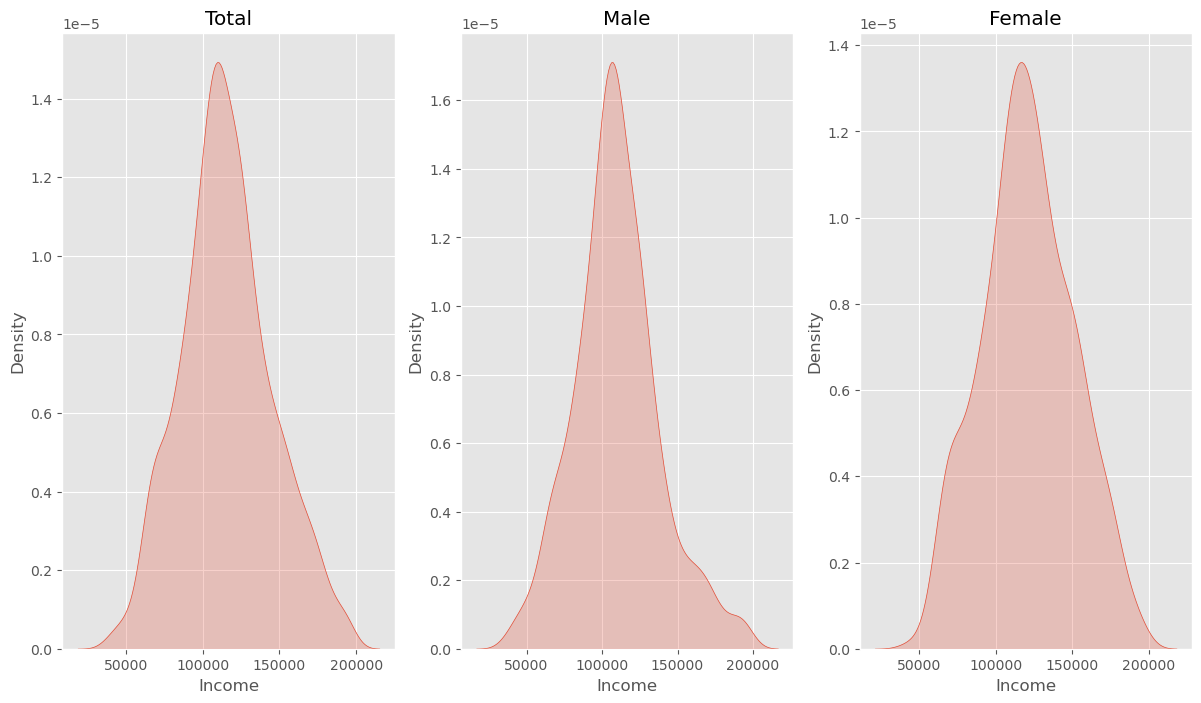

In [395]:
RelKPlot("Income","Sex",1,0)

In [396]:
def RelKPlot(feature,Selectedfeature,FirstValue,SecondValue,ThirdValue) : 
    global dataset
    fig, ax = plt.subplots(figsize=(35,8))
    
    plt.subplot(1,6,1)
    plt.title('Total')
    Data = dataset
    sns.kdeplot(Data[feature], shade=True)   

    plt.subplot(1,6,2)
    plt.title('Small City')
    Data = dataset[dataset[Selectedfeature]==FirstValue]
    sns.kdeplot(Data[feature], shade=True)   

    plt.subplot(1,6,3)
    plt.title('Mid-Sized City')
    Data = dataset[dataset[Selectedfeature]==SecondValue]
    sns.kdeplot(Data[feature], shade=True)
    
    plt.subplot(1,6,4)
    plt.title('Big City')
    Data = dataset[dataset[Selectedfeature]==ThirdValue]
    sns.kdeplot(Data[feature], shade=True)
    
    plt.show()  

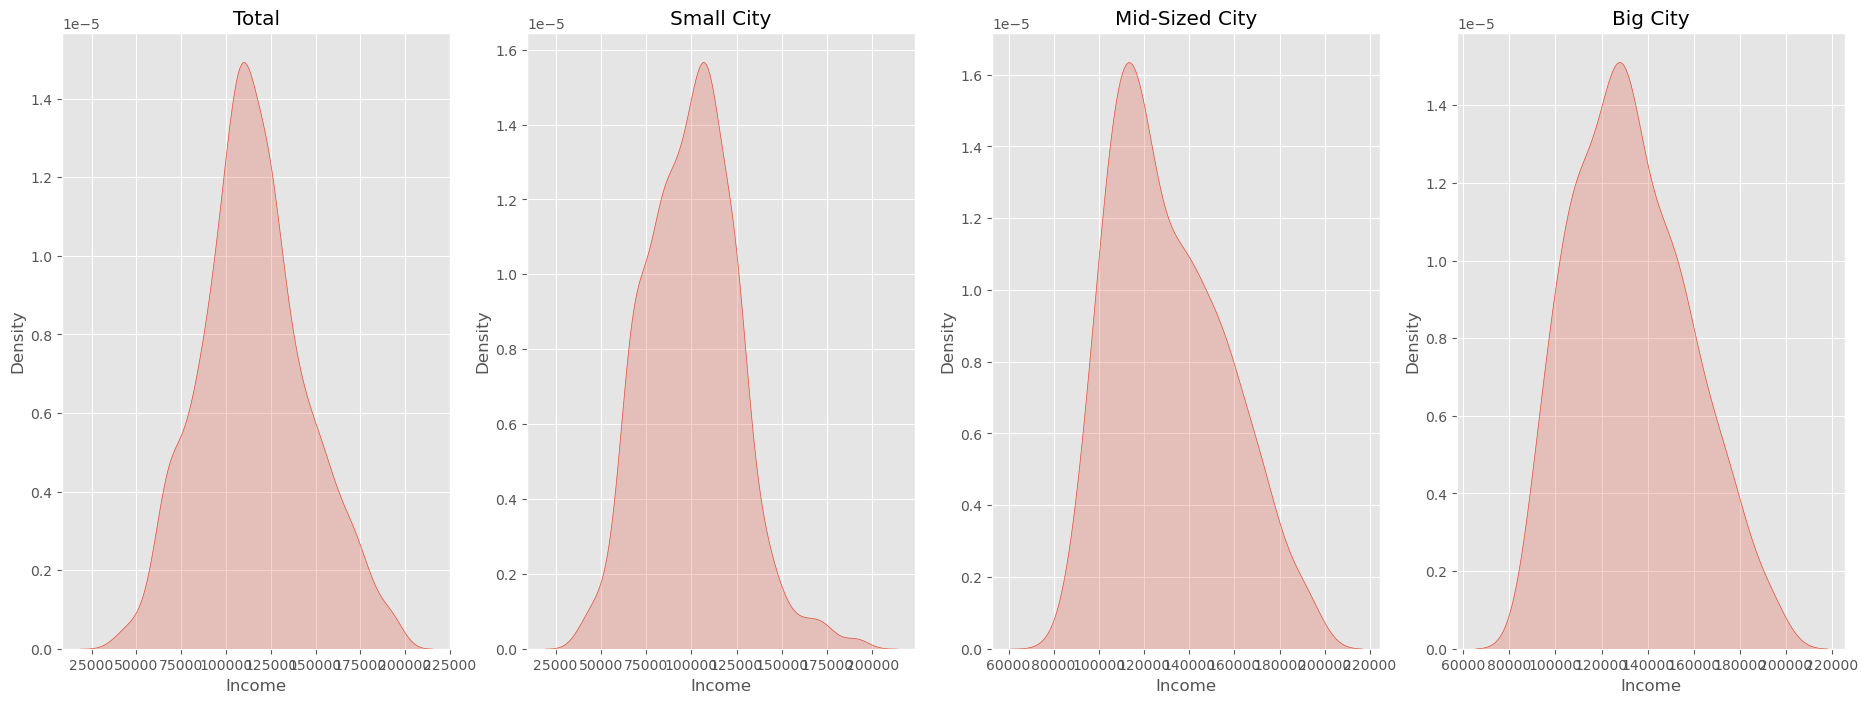

In [397]:
RelKPlot("Income","Settlement size",0,1,2)

Identify correlation between features

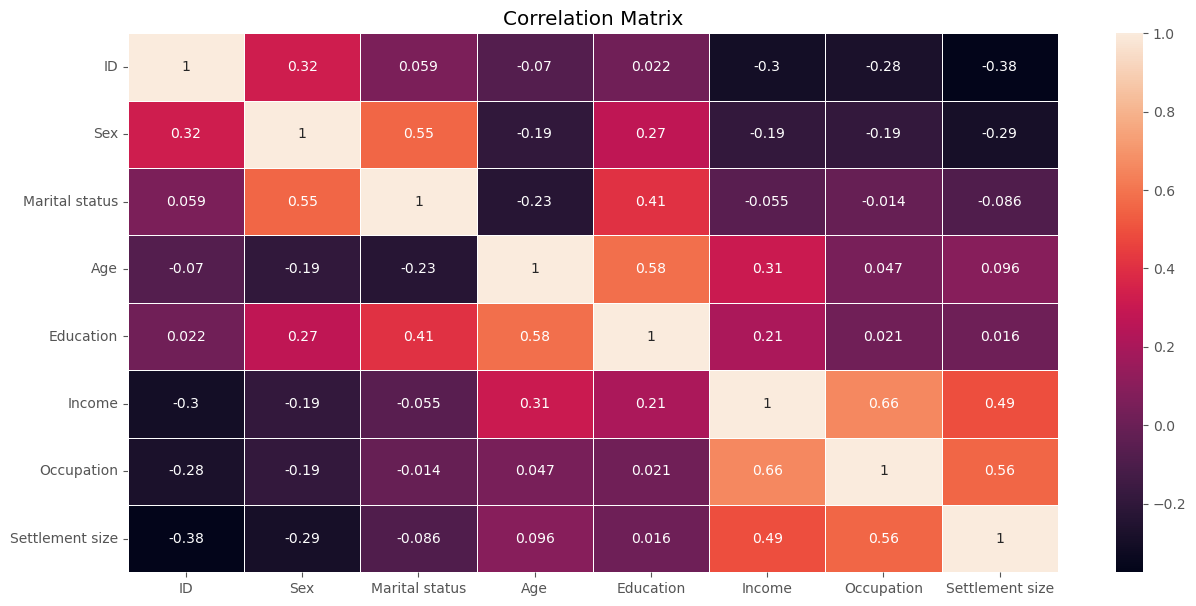

In [398]:
plt.figure(figsize=(15,7))
plt.title('Correlation Matrix')
sns.heatmap(dataset.select_dtypes(include='number').corr(),annot=True,linewidth=.5)
plt.show()

In [399]:
dataset = dataset.drop(columns=['ID'])

In [400]:
dataset

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
5,0,0,35,1,144848,0,0
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


# 4) Build Model

### K-Means

#### Ellbow Method

In [401]:
InertiaDict={}
for i in range(2,16):
    KMeansModel = KMeans(n_clusters=i,init='k-means++',random_state=33,algorithm= 'auto') # also can be full or elkan
    KMeansModel.fit(dataset)
    InertiaDict[i]=KMeansModel.inertia_

In [402]:
InertiaDict

{2: 609050916512.673,
 3: 287350691788.3449,
 4: 166349619320.45706,
 5: 114382553828.85988,
 6: 77798662057.04929,
 7: 60111379566.40618,
 8: 46449059983.955414,
 9: 38315366374.836754,
 10: 30534703702.63244,
 11: 24650538395.232353,
 12: 20592909062.344917,
 13: 17355564796.883614,
 14: 15430689089.412893,
 15: 13451458033.565079}

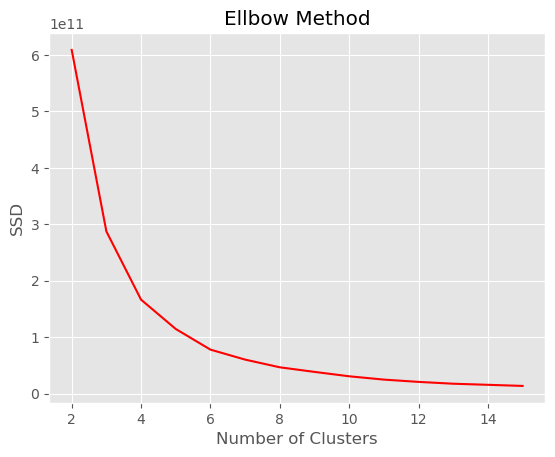

In [403]:
plt.title('Ellbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSD')
plt.plot(InertiaDict.keys(),InertiaDict.values(),color='r',linestyle='solid')
plt.show()

In [404]:
KMeansModel = KMeans(n_clusters=5,init='k-means++',random_state=33,algorithm= 'full') # also can be full or elkan
KMeansModel.fit(dataset)

KMeans(algorithm='full', n_clusters=5, random_state=33)

In [405]:
clusters=pd.DataFrame(KMeansModel.cluster_centers_,columns=dataset.columns,index=['ClusterA','ClusterB','ClusterC','ClusterD',
                                                                                 'ClusterE'])

In [406]:
clusters

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ClusterA,0.440385,0.473077,35.451923,0.992308,120956.225000,0.867308,0.775000
ClusterB,0.591228,0.598246,31.650877,0.954386,100411.228070,0.647368,0.540351
ClusterC,0.305732,0.404459,38.585987,1.079618,143953.143312,1.162420,1.191083
ClusterD,0.539519,0.477663,31.694158,0.821306,71498.659794,0.003436,0.003436
ClusterE,0.317919,0.514451,40.965318,1.248555,172501.421965,1.410405,1.283237


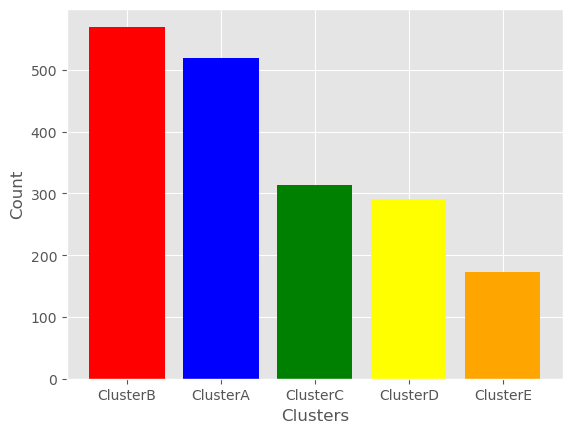

In [407]:
clusters=['ClusterB','ClusterA','ClusterC','ClusterD','ClusterE']
values=pd.Series(KMeansModel.labels_).value_counts()

plt.bar(clusters,values,color=['red','blue','green','yellow','orange'])
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.show()

In [408]:
dataset['label']=KMeansModel.labels_

In [409]:
dataset

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,label
1,1,1,22,1,150773,1,2,2
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,4
4,0,0,53,1,149031,1,1,2
5,0,0,35,1,144848,0,0,2
...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,0
1996,1,1,27,1,117744,1,0,0
1997,0,0,31,0,86400,0,0,1
1998,1,1,24,1,97968,0,0,1


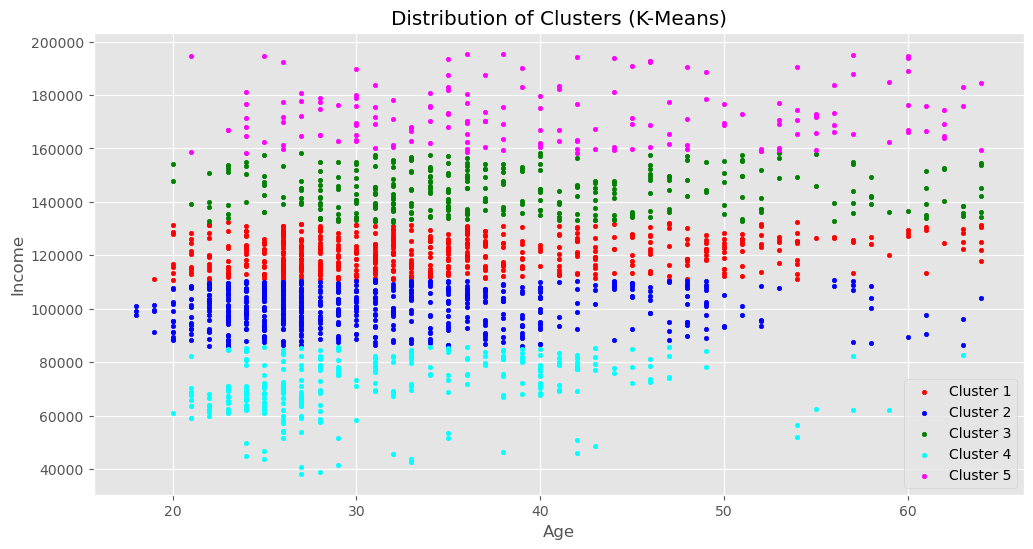

In [410]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(dataset.loc[dataset.iloc[:, -1] == 0, 'Age'], dataset.loc[dataset.iloc[:, -1] == 0, 'Income'], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(dataset.loc[dataset.iloc[:, -1] == 1, 'Age'], dataset.loc[dataset.iloc[:, -1] == 1, 'Income'], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(dataset.loc[dataset.iloc[:, -1] == 2, 'Age'], dataset.loc[dataset.iloc[:, -1] == 2, 'Income'], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(dataset.loc[dataset.iloc[:, -1] == 3, 'Age'], dataset.loc[dataset.iloc[:, -1] == 3, 'Income'], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(dataset.loc[dataset.iloc[:, -1] == 4, 'Age'], dataset.loc[dataset.iloc[:, -1] == 4, 'Income'], s = 10, c = 'magenta', label = 'Cluster 5')

plt.title('Distribution of Clusters (K-Means)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()


#### Obersavtions:

The Majority of Dataset belongs to CluserB

## Hierarchical Clusters

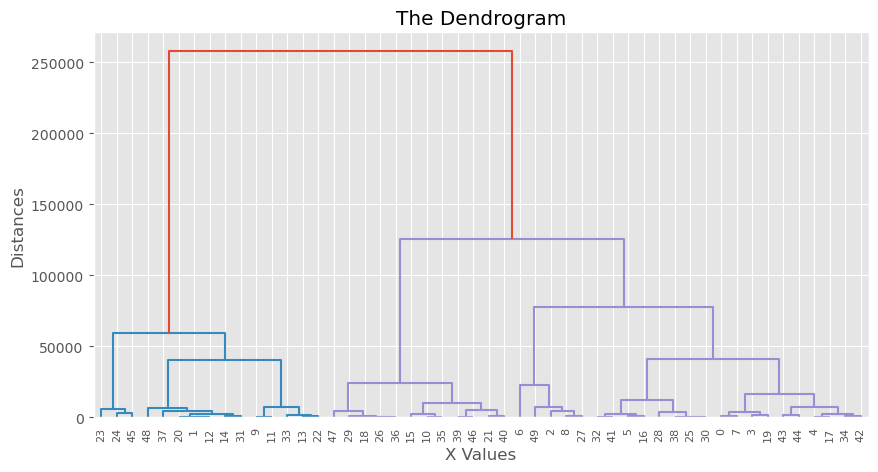

In [411]:
AggClusteringModel = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

y_pred= AggClusteringModel.fit_predict(dataset)
fig, ax = plt.subplots(figsize=(10,5))
dendrogram = sch.dendrogram(sch.linkage(dataset.iloc[:50,:], method = 'ward'))
plt.title('The Dendrogram')
plt.xlabel('X Values')
plt.ylabel('Distances')
plt.xticks(rotation=90)
plt.show()

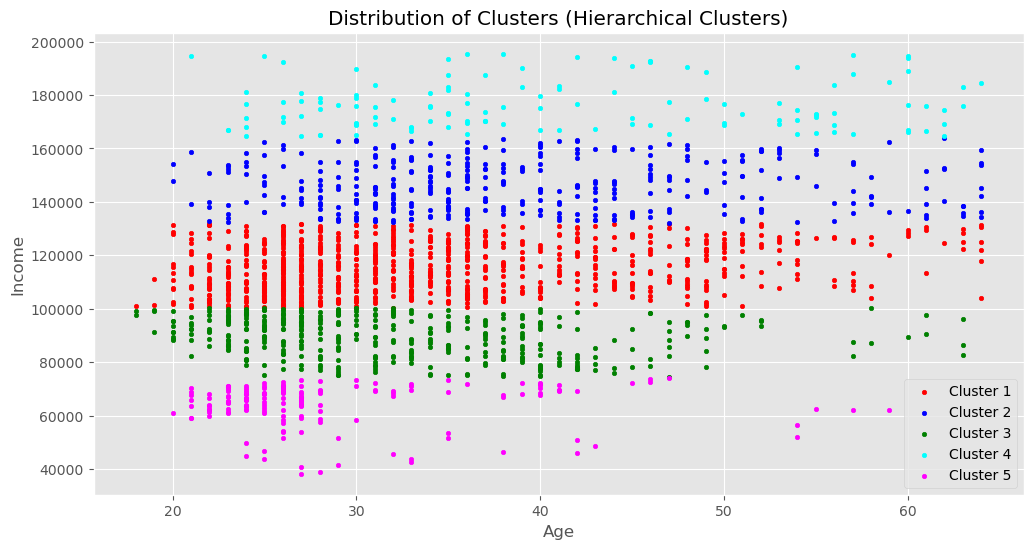

In [412]:
fig, ax = plt.subplots(figsize=(12,6))
plt.scatter(dataset.iloc[y_pred == 0, 2], dataset.iloc[y_pred == 0, 4], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(dataset.iloc[y_pred == 1, 2], dataset.iloc[y_pred == 1, 4], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(dataset.iloc[y_pred == 2, 2], dataset.iloc[y_pred == 2, 4], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(dataset.iloc[y_pred == 3, 2], dataset.iloc[y_pred == 3, 4], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(dataset.iloc[y_pred == 4, 2], dataset.iloc[y_pred == 4, 4], s = 10, c = 'magenta', label = 'Cluster 5')

plt.title('Distribution of Clusters (Hierarchical Clusters)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()
